<a href="https://colab.research.google.com/github/jay2jaykp/operation-odessa/blob/main/operation_odessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

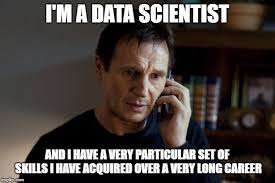